# Hypothesis Testing 
###### Effect of climate change on crop production 



In [179]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
# Suppress warnings from pandas
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
from sklearn.metrics import precision_score ,recall_score, f1_score
from sklearn.metrics import accuracy_score

In [2]:
from plotly.offline import iplot, init_notebook_mode,download_plotlyjs
import plotly.graph_objects as go
import plotly.express as px

In [3]:
#use this code to be able to display all the output in the cell instead of only displaying the out put for the last one. see the next cell.
from IPython.core.interactiveshell import InteractiveShell  
InteractiveShell.ast_node_interactivity = "all"

# Load data set:

In [ ]:
df_prod=pd.read_csv('FAOSTAT_crop_production.csv') # Total yearly crop production in tonnes by country
df_reg =pd.read_csv('regional_code.csv') #  regions for the country data 
df_crop =pd.read_csv('FAOSTAT_data_main_crop_yield.csv') # crop yield per hectare
df_temp = pd.read_csv('global_temp_change.csv')

In [5]:
df_crop.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,QC,Crops,2,Afghanistan,5419,Yield,44,Barley,1961,1961,hg/ha,10800.0,Fc,Calculated data
1,QC,Crops,2,Afghanistan,5419,Yield,44,Barley,1962,1962,hg/ha,10800.0,Fc,Calculated data
2,QC,Crops,2,Afghanistan,5419,Yield,44,Barley,1963,1963,hg/ha,10800.0,Fc,Calculated data
3,QC,Crops,2,Afghanistan,5419,Yield,44,Barley,1964,1964,hg/ha,10857.0,Fc,Calculated data
4,QC,Crops,2,Afghanistan,5419,Yield,44,Barley,1965,1965,hg/ha,10857.0,Fc,Calculated data


In [6]:
from pandas_profiling import ProfileReport
crop_profile = ProfileReport(df_crop)
crop_profile

Number of variables,14
Number of observations,37322
Total Missing (%),0.0%
Total size in memory,4.0 MiB
Average record size in memory,112.0 B
Numeric,4
Categorical,4
Boolean,0
Date,0
Text (Unique),0
Rejected,6


In [7]:
df_crop= df_crop.dropna()

In [8]:
df_crop.columns

Index(['Domain Code', 'Domain', 'Area Code', 'Area', 'Element Code', 'Element',
       'Item Code', 'Item', 'Year Code', 'Year', 'Unit', 'Value', 'Flag',
       'Flag Description'],
      dtype='object')

In [9]:
#change the column name
df_crop.rename(columns={'Value':'yield'}, inplace=True)

In [10]:
df_crop.columns

Index(['Domain Code', 'Domain', 'Area Code', 'Area', 'Element Code', 'Element',
       'Item Code', 'Item', 'Year Code', 'Year', 'Unit', 'yield', 'Flag',
       'Flag Description'],
      dtype='object')

We only need the following features from the data. the rest are either constant or irrelevant <br>
[ 'Area Code', 'Area','Item Code', 'Item', 'Year', 'Value']
       

In [11]:
df_crop = df_crop[['Area Code', 'Area','Item Code', 'Item', 'Year', 'yield']]
df_crop.tail()

,Area Code,Area,Item Code,Item,Year,yield
37317,181,Zimbabwe,15,Wheat,2014,22094.0
37318,181,Zimbabwe,15,Wheat,2015,20486.0
37319,181,Zimbabwe,15,Wheat,2016,19013.0
37320,181,Zimbabwe,15,Wheat,2017,17542.0
37321,181,Zimbabwe,15,Wheat,2018,20010.0


In [12]:
# def getFiltered(df,col):
#     df_sub=df.query("Item = {}".format(col))
#     df_sub_max = df_sub.groupby(['Year'], as_index = False)['Value'].max()
#     return df_sub_max  

In [13]:
df_crop['Item'].unique()

array(['Barley', 'Maize', 'Millet', 'Rice, paddy', 'Wheat', 'Sorghum'],
      dtype=object)

In [14]:
df_crop['Item'] = df_crop['Item'].str.replace('Rice, paddy', 'Rice')

In [15]:
df_crop['Item'].unique()

array(['Barley', 'Maize', 'Millet', 'Rice', 'Wheat', 'Sorghum'],
      dtype=object)

# Compare the yields in 2010-2014 & 2015-2019

In [19]:
df_crop.head()

,Area Code,Area,Item Code,Item,Year,yield
0,2,Afghanistan,44,Barley,1961,10800.0
1,2,Afghanistan,44,Barley,1962,10800.0
2,2,Afghanistan,44,Barley,1963,10800.0
3,2,Afghanistan,44,Barley,1964,10857.0
4,2,Afghanistan,44,Barley,1965,10857.0


In [229]:
#split the data into two groups by year
df_crop_early = df_crop.query("Year in [2010,2011,2012,2013,2014]")
df_crop_late = df_crop.query("Year in [2015,2016,2017,2018,2019]")

In [230]:
# group by crop type to see the difference by crop
df_crop_early_item = df_crop_early.groupby(['Item'], as_index =False)['yield'].sum()
df_crop_late_item = df_crop_late.groupby(['Item'], as_index =False)['yield'].sum()
df_crop_early_item.head()

,Item,yield
0,Barley,14945528.0
1,Maize,39375813.0
2,Millet,5575682.0
3,Rice,23271127.0
4,Sorghum,13287493.0


In [231]:
#merge the two groups
df_crop_early_late_item = pd.merge(df_crop_early_item, df_crop_late_item , on='Item',suffixes=('_early', '_late'))
df_crop_early_late_item.head()

,Item,yield_early,yield_late
0,Barley,14945528.0,13097659.0
1,Maize,39375813.0,32767738.0
2,Millet,5575682.0,5883755.0
3,Rice,23271127.0,18957323.0
4,Sorghum,13287493.0,11776531.0


Text(0, 0.5, 'Yield in tonnes')

Text(0.5, 0, 'Crop Type')

Text(0.5, 1.0, 'Yield (2011-2014) vs (2015-2019)')

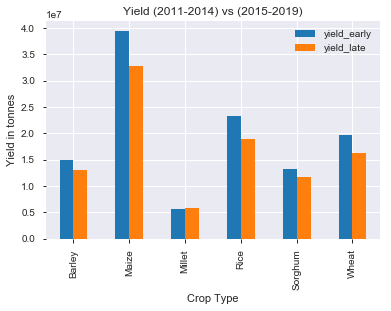

In [224]:
#plot the two grops
df_crop_early_late_item.set_index('Item', inplace=True)
df_crop_early_late_item.plot.bar()
plt.ylabel('Yield in tonnes')
plt.xlabel('Crop Type')
plt.title('Yield (2011-2014) vs (2015-2019)')

plt.show()

In [235]:
#calculate the rate of decrease
df_crop_early_late_item['roi'] = (df_crop_early_late_item['yield_late']-df_crop_early_late_item['yield_early'])/(df_crop_early_late_item['yield_late'])
df_crop_early_late_item['roi'] =df_crop_early_late_item['roi']*100
df_crop_early_late_item.head()

,Item,yield_early,yield_late,roi
0,Barley,14945528.0,13097659.0,-14.108391
1,Maize,39375813.0,32767738.0,-20.166406
2,Millet,5575682.0,5883755.0,5.235993
3,Rice,23271127.0,18957323.0,-22.755344
4,Sorghum,13287493.0,11776531.0,-12.830281


In [236]:
# plot the rate of change 
fig = px.bar(df_crop_early_late_item, x="Item", y= "roi").update_xaxes(categoryorder="max descending")
fig.update_layout(xaxis_tickangle = 45, title = 'Rate of Yield decrease early(2011-2014 ) vs late(2015-2019) by Crop' )
fig.show()

# Crop & Region merged

In order to make analysis by different regions we need the data with regions.

In [16]:
df_reg.head()

,Country Group Code,Country Group,Country Code,Country,M49 Code,ISO2 Code,ISO3 Code
0,5100,Africa,4,Algeria,12.0,DZ,DZA
1,5100,Africa,7,Angola,24.0,AO,AGO
2,5100,Africa,53,Benin,204.0,BJ,BEN
3,5100,Africa,20,Botswana,72.0,BW,BWA
4,5100,Africa,24,British Indian Ocean Territory,86.0,IO,IOT


In [17]:
# we only need the country code and group
df_region = df_reg[['Country Group','Country Code']]
df_region.head()

,Country Group,Country Code
0,Africa,4
1,Africa,7
2,Africa,53
3,Africa,20
4,Africa,24


In [20]:
df_crop_reg = pd.merge(df_crop, df_region, how='left', left_on=['Area Code'], right_on=['Country Code'])
df_crop_reg.head()

,Area Code,Area,Item Code,Item,Year,yield,Country Group,Country Code
0,2,Afghanistan,44,Barley,1961,10800.0,Asia,2.0
1,2,Afghanistan,44,Barley,1961,10800.0,Central Asia and Southern Asia,2.0
2,2,Afghanistan,44,Barley,1961,10800.0,Land Locked Developing Countries,2.0
3,2,Afghanistan,44,Barley,1961,10800.0,Least Developed Countries,2.0
4,2,Afghanistan,44,Barley,1961,10800.0,Low income economies,2.0


In [21]:
# df_crop_reg_profile = ProfileReport(df_crop_reg)
# df_crop_reg_profile

In [22]:
df_reg= df_reg.dropna()

In [23]:
df_crop_reg = df_crop_reg.dropna()

In [193]:
#rename the Country Group column
df_crop_reg.rename(columns={"Country Group": "region"} , inplace = True)
df_crop_reg['region'].unique()

array(['Asia', 'Central Asia and Southern Asia',
       'Land Locked Developing Countries', 'Least Developed Countries',
       'Low income economies', 'Low Income Food Deficit Countries',
       'Net Food Importing Developing Countries', 'Non-Annex I countries',
       'South Asia (exc India)', 'Southern Asia', 'World', 'Europe',
       'Northern America and Europe', 'Southern Europe',
       'Upper-middle-income economies', 'Africa',
       'North Africa (exc Sudan)', 'Northern Africa',
       'Western Asia and Northern Africa',
       'Lower-middle-income economies', 'Middle Africa',
       'Sub-Saharan Africa', 'Sub-Saharan Africa (including Sudan)',
       'Americas', 'Caribbean', 'High-income economies',
       'Latin America and the Caribbean',
       'Small Island Developing States', 'South America', 'Western Asia',
       'Annex I countries', 'Australia and New Zealand', 'Oceania',
       'OECD', 'European Union', 'Western Europe', 'Eastern Europe',
       'Central America', '

# Compare the yield between 2010-2014 and 2015-2019

In [203]:
df_crop_reg_early = df_crop_reg.query("Year in [2010,2011,2012,2013,2014]")
df_crop_reg_late = df_crop_reg.query("Year in [2015,2016,2017,2018,2019]")
df_crop_reg_early_r = df_crop_reg_early.groupby(['region'], as_index =False)['yield'].sum()
df_crop_reg_late_r = df_crop_reg_late.groupby(['region'], as_index =False)['yield'].sum()
df_crop_reg_early_r.head()
df_crop_reg_early_late_r = pd.merge(df_crop_reg_early_r, df_crop_reg_late_r , on='region',suffixes=('_early', '_late'))
#df_crop_reg_early_late_r.set_index('region', inplace=True)
df_crop_reg_early_late_r.head()


,region,yield
0,Africa,19369713.0
1,Americas,20367009.0
2,Annex I countries,39990228.0
3,Asia,36014087.0
4,Australia and New Zealand,2507117.0


,region,yield_early,yield_late
0,Africa,19369713.0,15745788.0
1,Americas,20367009.0,17045670.0
2,Annex I countries,39990228.0,33843079.0
3,Asia,36014087.0,31583382.0
4,Australia and New Zealand,2507117.0,2123360.0


In [226]:
import plotly.graph_objects as go
regions=df_crop_reg_early_late_r['region']
early = df_crop_reg_early_late_r['yield_early']
late =df_crop_reg_early_late_r['yield_late']
fig = go.Figure(data=[
    go.Bar(name='early', x=regions, y=early),
    go.Bar(name='late', x=regions, y=late)
])
# Change the bar mode
fig.update_layout(barmode='group', xaxis_tickangle = 45, title = 'Yield  early(2011-2014 ) vs late(2015-2019)' )
fig.show()

In [237]:
# calculate the rate of decrease
df_crop_reg_early_late_r['roi'] = (df_crop_reg_early_late_r['yield_late']-df_crop_reg_early_late_r['yield_early'])/(df_crop_reg_early_late_r['yield_late'])
df_crop_reg_early_late_r['roi'] =df_crop_reg_early_late_r['roi']*100
df_crop_reg_early_late_r.head()

,region,yield_early,yield_late,roi
0,Africa,19369713.0,15745788.0,-23.015203
1,Americas,20367009.0,17045670.0,-19.484943
2,Annex I countries,39990228.0,33843079.0,-18.163681
3,Asia,36014087.0,31583382.0,-14.028596
4,Australia and New Zealand,2507117.0,2123360.0,-18.073101


In [222]:
df_crop_reg_early_late_r.nlargest(10,['roi'])

,region,yield_early,yield_late,roi
10,Eastern Africa,7262080.0,5587399.0,23.060625
49,Western Europe,9604588.0,7534693.0,21.551107
43,Sub-Saharan Africa,14919247.0,11710138.0,21.509859
9,East Asia (exc China),1873050.0,1472181.0,21.401938
25,Middle Africa,1770831.0,1393781.0,21.292263
44,Sub-Saharan Africa (including Sudan),15126312.0,12067805.0,20.219780
40,Southern Africa,1808043.0,1448636.0,19.878233
11,Eastern Asia,5135306.0,4124649.0,19.680560
19,Least Developed Countries,14939847.0,12019649.0,19.546372
46,Western Africa,4681812.0,3786067.0,19.132443


In [256]:
fig = px.bar(df_crop_reg_early_late_r, x="region", y= "roi").update_xaxes(categoryorder="max descending")
fig.update_layout(barmode='group', xaxis_tickangle = 45, 
                  title = 'Rate of Yield decrease early(2011-2014 ) vs late(2015-2019)',
yaxis_title="Percentage Rate of Increase")                  
fig.show()

# Temprature

In [25]:
df_temp.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Months Code,Months,Year Code,Year,Unit,Value,Flag,Flag Description
0,ET,Temperature change,2,Afghanistan,7271,Temperature change,7001,January,1961,1961,°C,0.777,Fc,Calculated data
1,ET,Temperature change,2,Afghanistan,7271,Temperature change,7001,January,1962,1962,°C,0.062,Fc,Calculated data
2,ET,Temperature change,2,Afghanistan,7271,Temperature change,7001,January,1963,1963,°C,2.744,Fc,Calculated data
3,ET,Temperature change,2,Afghanistan,7271,Temperature change,7001,January,1964,1964,°C,-5.232,Fc,Calculated data
4,ET,Temperature change,2,Afghanistan,7271,Temperature change,7001,January,1965,1965,°C,1.868,Fc,Calculated data


In [26]:
df_temp.columns

Index(['Domain Code', 'Domain', 'Area Code', 'Area', 'Element Code', 'Element',
       'Months Code', 'Months', 'Year Code', 'Year', 'Unit', 'Value', 'Flag',
       'Flag Description'],
      dtype='object')

In [27]:
df_temp.rename(columns={'Value':'temperature'}, inplace =True)

In [28]:
df_temp.columns

Index(['Domain Code', 'Domain', 'Area Code', 'Area', 'Element Code', 'Element',
       'Months Code', 'Months', 'Year Code', 'Year', 'Unit', 'temperature',
       'Flag', 'Flag Description'],
      dtype='object')

We only need the following features from the data. the rest are either constant or irrelevant <br>
[ 'Area Code', 'Area','Months Code', 'Months', 'Year', 'Value']

In [29]:
df_temp = df_temp[[ 'Area Code', 'Area','Months Code', 'Months', 'Year', 'temperature']]
df_temp.head()

,Area Code,Area,Months Code,Months,Year,temperature
0,2,Afghanistan,7001,January,1961,0.777
1,2,Afghanistan,7001,January,1962,0.062
2,2,Afghanistan,7001,January,1963,2.744
3,2,Afghanistan,7001,January,1964,-5.232
4,2,Afghanistan,7001,January,1965,1.868


In [30]:
df_temp.isna().sum()

Area Code         0
Area              0
Months Code       0
Months            0
Year              0
temperature    7685
dtype: int64

In [31]:
df_temp=df_temp.dropna()

In [32]:
df_temp_metro = df_temp.query("Months == 'Meteorological year'") 
df_temp_metro.head()

,Area Code,Area,Months Code,Months,Year,temperature
944,2,Afghanistan,7020,Meteorological year,1961,-0.080
945,2,Afghanistan,7020,Meteorological year,1962,-0.120
946,2,Afghanistan,7020,Meteorological year,1963,0.882
947,2,Afghanistan,7020,Meteorological year,1964,-0.727
948,2,Afghanistan,7020,Meteorological year,1965,-0.200


In [33]:
df_temp_metro_2016 =df_temp_metro.query("Year == '2016' ")
df_temp_metro_2016.head()

,Area Code,Area,Months Code,Months,Year,temperature
999,2,Afghanistan,7020,Meteorological year,2016,1.473
2002,3,Albania,7020,Meteorological year,2016,1.697
3005,4,Algeria,7020,Meteorological year,2016,1.866
4008,5,American Samoa,7020,Meteorological year,2016,1.648
5011,6,Andorra,7020,Meteorological year,2016,1.917


# Merging the Temperature  & crop data

In [35]:
df_crop_reg_sorted=df_crop_reg.sort_values(by=['Year'])
df_temp_sorted=df_temp.sort_values(by=['Year'])

In [36]:
df_crop_temp  = pd.merge_asof(df_temp_sorted, df_crop_reg_sorted,
              on='Year',
              by='Area')

df_crop_temp.head()

,Area Code_x,Area,Months Code,Months,Year,temperature,Area Code_y,Item Code,Item,yield,Country Group,Country Code
0,2,Afghanistan,7001,January,1961,0.777,2.0,44.0,Barley,10800.0,Southern Asia,2.0
1,25,Solomon Islands,7005,May,1961,0.233,25.0,27.0,Rice,17391.0,World,25.0
2,259,Channel Islands,7005,May,1961,0.227,NaN,NaN,NaN,NaN,NaN,NaN
3,25,Solomon Islands,7006,June,1961,0.373,25.0,27.0,Rice,17391.0,World,25.0
4,259,Channel Islands,7004,April,1961,2.249,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
df_crop_reg.head()

,Area Code,Area,Item Code,Item,Year,yield,Country Group,Country Code
0,2,Afghanistan,44,Barley,1961,10800.0,Asia,2.0
1,2,Afghanistan,44,Barley,1961,10800.0,Central Asia and Southern Asia,2.0
2,2,Afghanistan,44,Barley,1961,10800.0,Land Locked Developing Countries,2.0
3,2,Afghanistan,44,Barley,1961,10800.0,Least Developed Countries,2.0
4,2,Afghanistan,44,Barley,1961,10800.0,Low income economies,2.0


In [38]:
df_crop_temp.isna().sum()

Area Code_x          0
Area                 0
Months Code          0
Months               0
Year                 0
temperature          0
Area Code_y      48500
Item Code        48500
Item             48500
yield            48500
Country Group    48500
Country Code     48500
dtype: int64

In [39]:
df_crop_temp= df_crop_temp.dropna()

In [40]:
df_crop_temp.shape

(169677, 12)

In [41]:
df_crop_temp.isna().sum()

Area Code_x      0
Area             0
Months Code      0
Months           0
Year             0
temperature      0
Area Code_y      0
Item Code        0
Item             0
yield            0
Country Group    0
Country Code     0
dtype: int64

In [42]:
# query by name of the crop
product =df_crop_temp['Item'].unique()
for prod in product:
     globals()[prod] = df_crop_temp.loc[df_crop_temp['Item'] == prod]

In [45]:
Maize_max =Maize.groupby(['Year'], as_index = False)['yield'].max()
Wheat_max =Wheat.groupby(['Year'], as_index = False)['yield'].max()
Rice_max =Rice.groupby(['Year'], as_index = False)['yield'].max()

In [46]:
# df_crop_temp.rename(columns={"Country Group": "region"} , inplace = True)
# df_crop_temp['region'].unique()

array(['Southern Asia', 'World', 'Land Locked Developing Countries',
       'Americas', 'Sub-Saharan Africa (including Sudan)',
       'Net Food Importing Developing Countries', 'Sub-Saharan Africa',
       'Non-Annex I countries', 'Africa', 'Least Developed Countries',
       'Asia', 'Eastern Asia and South-eastern Asia',
       'Low Income Food Deficit Countries', 'Eastern Africa',
       'Latin America and the Caribbean', 'Annex I countries', 'OECD',
       'High-income economies', 'Europe', 'Lower-middle-income economies',
       'South America', 'Western Europe',
       'Small Island Developing States', 'Western Africa',
       'Northern America and Europe', 'Western Asia and Northern Africa',
       'Upper-middle-income economies', 'Caribbean',
       'Oceania excluding Australia and New Zealand', 'Northern Africa',
       'Central America', 'Northern Europe', 'Oceania',
       'Central Asia and Southern Asia', 'Western Asia',
       'Southern Europe', 'Southern Africa', 'Europea

In [47]:
df_crop_temp['region'] = df_crop_temp['region'].str.replace(' ','_')
df_crop_temp['region'].unique()

array(['Southern_Asia', 'World', 'Land_Locked_Developing_Countries',
       'Americas', 'Sub-Saharan_Africa_(including_Sudan)',
       'Net_Food_Importing_Developing_Countries', 'Sub-Saharan_Africa',
       'Non-Annex_I_countries', 'Africa', 'Least_Developed_Countries',
       'Asia', 'Eastern_Asia_and_South-eastern_Asia',
       'Low_Income_Food_Deficit_Countries', 'Eastern_Africa',
       'Latin_America_and_the_Caribbean', 'Annex_I_countries', 'OECD',
       'High-income_economies', 'Europe', 'Lower-middle-income_economies',
       'South_America', 'Western_Europe',
       'Small_Island_Developing_States', 'Western_Africa',
       'Northern_America_and_Europe', 'Western_Asia_and_Northern_Africa',
       'Upper-middle-income_economies', 'Caribbean',
       'Oceania_excluding_Australia_and_New_Zealand', 'Northern_Africa',
       'Central_America', 'Northern_Europe', 'Oceania',
       'Central_Asia_and_Southern_Asia', 'Western_Asia',
       'Southern_Europe', 'Southern_Africa', 'Europea

In [48]:
df_crop_temp['region'] = df_crop_temp['region'].str.replace('-','_')
df_crop_temp['region'].unique()

array(['Southern_Asia', 'World', 'Land_Locked_Developing_Countries',
       'Americas', 'Sub_Saharan_Africa_(including_Sudan)',
       'Net_Food_Importing_Developing_Countries', 'Sub_Saharan_Africa',
       'Non_Annex_I_countries', 'Africa', 'Least_Developed_Countries',
       'Asia', 'Eastern_Asia_and_South_eastern_Asia',
       'Low_Income_Food_Deficit_Countries', 'Eastern_Africa',
       'Latin_America_and_the_Caribbean', 'Annex_I_countries', 'OECD',
       'High_income_economies', 'Europe', 'Lower_middle_income_economies',
       'South_America', 'Western_Europe',
       'Small_Island_Developing_States', 'Western_Africa',
       'Northern_America_and_Europe', 'Western_Asia_and_Northern_Africa',
       'Upper_middle_income_economies', 'Caribbean',
       'Oceania_excluding_Australia_and_New_Zealand', 'Northern_Africa',
       'Central_America', 'Northern_Europe', 'Oceania',
       'Central_Asia_and_Southern_Asia', 'Western_Asia',
       'Southern_Europe', 'Southern_Africa', 'Europea

In [49]:
regions =df_crop_temp['region'].unique()
for reg in regions:
     globals()[reg] = df_crop_temp.loc[df_crop_temp['region'] == reg]

In [50]:
Africa.head()

,Area Code_x,Area,Months Code,Months,Year,temperature,Area Code_y,Item Code,Item,yield,region,Country Code
215,35,Cabo Verde,7011,November,1961,-0.542,35.0,56.0,Maize,6500.0,Africa,35.0
217,35,Cabo Verde,7010,October,1961,-0.184,35.0,56.0,Maize,6500.0,Africa,35.0
219,35,Cabo Verde,7009,September,1961,-0.416,35.0,56.0,Maize,6500.0,Africa,35.0
221,35,Cabo Verde,7008,August,1961,0.117,35.0,56.0,Maize,6500.0,Africa,35.0
223,35,Cabo Verde,7007,July,1961,0.012,35.0,56.0,Maize,6500.0,Africa,35.0


In [52]:
Africa_maize = Africa.query("Item=='Maize'")
Africa_maize_max = Africa_maize.groupby(['Year'], as_index=False)['yield'].max()
Africa_rice = Africa.query("Item=='Rice'")
Africa_rice_max = Africa_rice.groupby(['Year'], as_index=False)['yield'].max()
Africa_wheat = Africa.query("Item=='Wheat'")
Africa_wheat_max = Africa_wheat.groupby(['Year'], as_index=False)['yield'].max()

In [239]:
df_crop_temp['temp']= df_crop_temp.temperature.apply(lambda x : 'low' if (x>=0 and x<=2) else 'high')     
df_crop_temp.head()

,Area Code_x,Area,Months Code,Months,Year,temperature,Area Code_y,Item Code,Item,yield,region,Country Code,temp
0,2,Afghanistan,7001,January,1961,0.777,2.0,44.0,Barley,10800.0,Southern_Asia,2.0,low
1,25,Solomon Islands,7005,May,1961,0.233,25.0,27.0,Rice,17391.0,World,25.0,low
3,25,Solomon Islands,7006,June,1961,0.373,25.0,27.0,Rice,17391.0,World,25.0,low
5,25,Solomon Islands,7007,July,1961,0.462,25.0,27.0,Rice,17391.0,World,25.0,low
7,25,Solomon Islands,7008,August,1961,0.211,25.0,27.0,Rice,17391.0,World,25.0,low


In [244]:
df_crop_temp_high = df_crop_temp.query("temp=='high'")
df_crop_temp_low = df_crop_temp.query("temp=='low'")
df_crop_temp_high_i = df_crop_temp_high.groupby(['Item'], as_index =False)['yield'].sum()
df_crop_temp_low_i = df_crop_temp_low.groupby(['Item'], as_index =False)['yield'].sum()
df_crop_temp_low_i.head()
df_crop_temp_high_low_i = pd.merge(df_crop_temp_high_i, df_crop_temp_low_i , on='Item',suffixes=('_high', '_low'))
#df_crop_reg_early_late_r.set_index('region', inplace=True)
df_crop_temp_high_low_i.head()


,Item,yield
0,Barley,343775426.0
1,Maize,990381922.0
2,Millet,93654532.0
3,Rice,643629657.0
4,Sorghum,265219123.0


,Item,yield_high,yield_low
0,Barley,264857495.0,343775426.0
1,Maize,450261303.0,990381922.0
2,Millet,55939892.0,93654532.0
3,Rice,264996551.0,643629657.0
4,Sorghum,113150759.0,265219123.0


In [251]:
import plotly.graph_objects as go
regions=df_crop_temp_high_low_i['Item']
high = df_crop_temp_high_low_i['yield_high']
low =df_crop_temp_high_low_i['yield_low']
fig = go.Figure(data=[
    go.Bar(name='high', x=regions, y=high),
    go.Bar(name='low', x=regions, y=low)
])
# Change the bar mode
fig.update_layout(barmode='group', xaxis_tickangle = 45, title = 'Yield in high vs low temperature Anomaly', 
xaxis_title="Crop Type",
yaxis_title="Yield per Hectare")                  

fig.show()

# Hypothesis testing

In [109]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
from scipy import stats

In [55]:
# def GetByReg(df):
#     product =df_crop['Item'].unique()
#     for prod in product:
#     globals()[prod] = df_crop.loc[df_crop['Item'] == prod]
#     return globals()[prod] 

In [56]:
df_crop_temp.head()

,Area Code_x,Area,Months Code,Months,Year,temperature,Area Code_y,Item Code,Item,yield,region,Country Code
0,2,Afghanistan,7001,January,1961,0.777,2.0,44.0,Barley,10800.0,Southern_Asia,2.0
1,25,Solomon Islands,7005,May,1961,0.233,25.0,27.0,Rice,17391.0,World,25.0
3,25,Solomon Islands,7006,June,1961,0.373,25.0,27.0,Rice,17391.0,World,25.0
5,25,Solomon Islands,7007,July,1961,0.462,25.0,27.0,Rice,17391.0,World,25.0
7,25,Solomon Islands,7008,August,1961,0.211,25.0,27.0,Rice,17391.0,World,25.0


In [58]:
#query the yearly temperature anomaly only
df_crop_temp_metro = df_crop_temp.query("Months == 'Meteorological year'") 
df_crop_temp_metro.head()

,Area Code_x,Area,Months Code,Months,Year,temperature,Area Code_y,Item Code,Item,yield,region,Country Code
23,39,Chad,7020,Meteorological year,1961,-0.426,39.0,56.0,Maize,10588.0,Land_Locked_Developing_Countries,39.0
52,25,Solomon Islands,7020,Meteorological year,1961,0.146,25.0,27.0,Rice,17391.0,World,25.0
59,201,Somalia,7020,Meteorological year,1961,0.305,201.0,56.0,Maize,8696.0,Net_Food_Importing_Developing_Countries,201.0
100,37,Central African Republic,7020,Meteorological year,1961,0.008,37.0,27.0,Rice,8571.0,Sub_Saharan_Africa_(including_Sudan),37.0
133,195,Senegal,7020,Meteorological year,1961,-0.218,195.0,79.0,Millet,4529.0,Non_Annex_I_countries,195.0


In [ ]:
test_df_g['temp']= test_df_g.temperature.apply(lambda x : 'low' if (x>=0 and x<=2) else 'high')     
test_df_g.head()

In [140]:
df_high_temp = df_crop_temp_metro.query( "temperature > 1")
df_low_temp =df_crop_temp_metro.query( "temperature > 0 and temperature < = 1")
df_low_temp.head()

,Area Code_x,Area,Months Code,Months,Year,temperature,Area Code_y,Item Code,Item,yield,region,Country Code
52,25,Solomon Islands,7020,Meteorological year,1961,0.146,25.0,27.0,Rice,17391.0,World,25.0
59,201,Somalia,7020,Meteorological year,1961,0.305,201.0,56.0,Maize,8696.0,Net_Food_Importing_Developing_Countries,201.0
100,37,Central African Republic,7020,Meteorological year,1961,0.008,37.0,27.0,Rice,8571.0,Sub_Saharan_Africa_(including_Sudan),37.0
142,96,"China, Hong Kong SAR",7020,Meteorological year,1961,0.047,96.0,27.0,Rice,20168.0,Non_Annex_I_countries,96.0
236,29,Burundi,7020,Meteorological year,1961,0.068,29.0,56.0,Maize,9596.0,Africa,29.0


In [159]:
df_high_temp_ave = df_high_temp.groupby(['temperature','region'], as_index =False)['yield'].mean()
df_low_temp_ave =df_low_temp.groupby(['temperature','region'], as_index =False)['yield'].mean()
df_low_temp_ave.head()

,temperature,region,yield
0,0.001,Americas,25900.0
1,0.001,Latin_America_and_the_Caribbean,14428.0
2,0.001,Lower_middle_income_economies,7224.0
3,0.001,World,64444.0
4,0.002,Americas,17507.0


In [148]:
import plotly.graph_objects as go
fig = go.Figure()
trace1 = go.Scatter(x=df_high_temp_ave["Year"], y=df_high_temp_ave["yield"], mode="lines+markers", name="high temp")
fig.add_trace(trace1)
trace2 = go.Scatter(x=df_low_temp_ave["Year"], y=df_low_temp_ave["yield"], mode="lines+markers", name="Low temp")
fig.add_trace(trace2)
fig.update_layout(
    title={
        "text": "Global Average Yield in High & Low Temperature Anomaly",
        "x":0.5,
        "xanchor": "center"
        },
    xaxis_title="Year",
    yaxis_title="Yield per Hectare")
fig.show()

In [63]:
Rice_max =Rice.groupby(['Year'], as_index = False)['yield'].max()

In [64]:
df_crop_temp.query("temperature > 0")

,Area Code_x,Area,Months Code,Months,Year,temperature,Area Code_y,Item Code,Item,yield,region,Country Code
0,2,Afghanistan,7001,January,1961,0.777,2.0,44.0,Barley,10800.0,Southern_Asia,2.0
1,25,Solomon Islands,7005,May,1961,0.233,25.0,27.0,Rice,17391.0,World,25.0
3,25,Solomon Islands,7006,June,1961,0.373,25.0,27.0,Rice,17391.0,World,25.0
5,25,Solomon Islands,7007,July,1961,0.462,25.0,27.0,Rice,17391.0,World,25.0
7,25,Solomon Islands,7008,August,1961,0.211,25.0,27.0,Rice,17391.0,World,25.0
9,25,Solomon Islands,7009,September,1961,0.296,25.0,27.0,Rice,17391.0,World,25.0
15,25,Solomon Islands,7012,December,1961,0.206,25.0,27.0,Rice,17391.0,World,25.0
17,25,Solomon Islands,7016,Dec–Jan–Feb,1961,0.078,25.0,27.0,Rice,17391.0,World,25.0
19,25,Solomon Islands,7017,Mar–Apr–May,1961,0.171,25.0,27.0,Rice,17391.0,World,25.0
20,39,Chad,7016,Dec–Jan–Feb,1961,0.440,39.0,56.0,Maize,10588.0,Land_Locked_Developing_Countries,39.0


In [65]:
df_crop_temp['region'].unique()

array(['Southern_Asia', 'World', 'Land_Locked_Developing_Countries',
       'Americas', 'Sub_Saharan_Africa_(including_Sudan)',
       'Net_Food_Importing_Developing_Countries', 'Sub_Saharan_Africa',
       'Non_Annex_I_countries', 'Africa', 'Least_Developed_Countries',
       'Asia', 'Eastern_Asia_and_South_eastern_Asia',
       'Low_Income_Food_Deficit_Countries', 'Eastern_Africa',
       'Latin_America_and_the_Caribbean', 'Annex_I_countries', 'OECD',
       'High_income_economies', 'Europe', 'Lower_middle_income_economies',
       'South_America', 'Western_Europe',
       'Small_Island_Developing_States', 'Western_Africa',
       'Northern_America_and_Europe', 'Western_Asia_and_Northern_Africa',
       'Upper_middle_income_economies', 'Caribbean',
       'Oceania_excluding_Australia_and_New_Zealand', 'Northern_Africa',
       'Central_America', 'Northern_Europe', 'Oceania',
       'Central_Asia_and_Southern_Asia', 'Western_Asia',
       'Southern_Europe', 'Southern_Africa', 'Europea

In [66]:
df_crop_temp['Item'].unique()

array(['Barley', 'Rice', 'Maize', 'Millet', 'Sorghum', 'Wheat'],
      dtype=object)

## Normality check

##### H0: Distribution is normal
##### HA: Distribution is not normal

In [71]:
# To check if the data is normally distributed using Shapiro test
def NormalityCheck(df):
    result = stats.shapiro(df) # to test if the discounted group distribution is normal
    print('The test stattistics is: {}' .format(result))
    if result[1] < 0.05:
        print('The test statistic is less than .05 , the null hypothesis is rejected and the data is not normally distributed')
    else:
        print('The test statistic is greater than .05 , we fail to reject the null hypothesis and the data is normally distributed')
    print('The size of the data is : {}'.format(len(df))) 

## Distribution plot

In [79]:
def NormalityPlot(df,df1,df2):
    plt.figure(figsize=(20, 10))
    sns.distplot(df, label='population data')
    sns.distplot(df1, label='high temp')
    sns.distplot(df2, label='low temp')
    plt.title('Distribution of temprature', fontsize=16)
    plt.xlabel('temp', fontsize=16)
    plt.legend(frameon=False, fontsize=16, loc='best')
    plt.show()

## Checking for equal variance

##### H0: The two variances are the same.
##### HA: The variances are not the same.

In [84]:
#Testing for equal variance between the two groups by using the levene's test
def EqualVarianceCheck(df1,df2):
    print ('Hypothesis Testing for Equal Variance' '\n\n' )
    print('H0: The two variances are equal')
    print('HA: The two variances are not equal' '\n')
    print ('The sizes of the data are {} and {}' '\n' .format(len(df1), len(df2)))
    result_l = stats.levene(df1, df2) # to test normality
    print('{}' '\n' .format(result_l))
    if result_l[1] < 0.05:
        print('The test statistic is less than .05 , the null hypothesis is rejected and the two variances are not the same')

    else:
        print('The test statistic is greater than .05 , we fail to reject the null hypothesis and the two variances are the same')
       

## Welch's test 

In [86]:
def WelchsTestVarTrue(df1,df2):
    result_w = stats.ttest_ind(dfl, df2)
    print('{}' '\n' .format(result_w))
    if result_w[1] < 0.05:
         print('The test statistic is less than .05 , the null hypothesis is rejected and Temperature has an effect on the crop yield')
    else:    
        print('The test statistic is greater than .05 , we fail to reject the null hypothesis and temprature has an effect on crop yield')

In [88]:
result_w = stats.ttest_ind(Low_income_economies_m_h['yield'],Low_income_economies_m_n['yield'], equal_var=True)
print('{}' '\n' .format(result_w))
if result_w[1] < 0.05:
     print('The test statistic is less than .05 , the null hypothesis is rejected and Temperature has an effect on the crop yield')
else:    
    print('The test statistic is greater than .05 , we fail to reject the null hypothesis and temprature has an effect on crop yield')

Ttest_indResult(statistic=1.9980441974457954, pvalue=0.04837389563802079)

The test statistic is less than .05 , the null hypothesis is rejected and Temperature has an effect on the crop yield


## Cohen d 

In [89]:
def Cohen_d(group1, group2):
    diff = group1.mean() - group2.mean()
    n1, n2 = len(group1), len(group2)
    var1 = group1.var()
    var2 = group2.var()
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    # Calculate Cohen's d statistic
    d = diff / np.sqrt(pooled_var)
    return round(abs(d), 1)

###### Split the date into high and low temperature

In [132]:
df_crop_temp_m = df_crop_temp.query("Months == 'Meteorological year'")
df_crop_temp_m_h = df_crop_temp_m.query( "temperature > 0")
df_crop_temp_m_l =  df_crop_temp_m.query( "temperature <= 0")
df_crop_temp_m_h_reg =df_crop_temp_m_h.groupby('region').mean()
df_crop_temp_m_l_reg =df_crop_temp_m_l.groupby('region').mean()
df_crop_temp_m_l_reg.head()

,Area Code_x,Months Code,Year,temperature,Area Code_y,Item Code,yield,Country Code
region,,,,,,,,
Africa,118.975904,7020.0,1973.337349,-0.250096,118.975904,52.542169,13179.349398,118.975904
Americas,100.398734,7020.0,1971.835443,-0.228994,100.398734,49.088608,20996.170886,100.398734
Annex_I_countries,117.681250,7020.0,1976.268750,-0.433537,117.681250,41.025000,34026.837500,117.681250
Asia,129.045752,7020.0,1976.313725,-0.310320,129.045752,47.000000,18764.764706,129.045752
Australia_and_New_Zealand,156.000000,7020.0,1984.000000,-0.148667,156.000000,24.666667,43965.666667,156.000000


In [106]:
df_crop_temp_m_l.shape
df_crop_temp_m_h.shape
df_crop_temp_m_h.head()


(2214, 12)

(7762, 12)

,Area Code_x,Area,Months Code,Months,Year,temperature,Area Code_y,Item Code,Item,yield,region,Country Code
52,25,Solomon Islands,7020,Meteorological year,1961,0.146,25.0,27.0,Rice,17391.0,World,25.0
59,201,Somalia,7020,Meteorological year,1961,0.305,201.0,56.0,Maize,8696.0,Net_Food_Importing_Developing_Countries,201.0
100,37,Central African Republic,7020,Meteorological year,1961,0.008,37.0,27.0,Rice,8571.0,Sub_Saharan_Africa_(including_Sudan),37.0
142,96,"China, Hong Kong SAR",7020,Meteorological year,1961,0.047,96.0,27.0,Rice,20168.0,Non_Annex_I_countries,96.0
236,29,Burundi,7020,Meteorological year,1961,0.068,29.0,56.0,Maize,9596.0,Africa,29.0


In [101]:
EqualVarianceCheck(df_crop_temp_m_l['yield'],df_crop_temp_m_h['yield'])

Hypothesis Testing for Equal Variance


H0: The two variances are equal
HA: The two variances are not equal

The sizes of the data are 2214 and 7762

LeveneResult(statistic=65.78076752696388, pvalue=5.632812188069084e-16)

The test statistic is less than .05 , the null hypothesis is rejected and the two variances are not the same


Since they don't have the same variance we need to use Welch's t test 

In [102]:
result_w = stats.ttest_ind(df_crop_temp_m_l['yield'],df_crop_temp_m_h['yield'], equal_var=False)
print('{}' '\n' .format(result_w))
if result_w[1] < 0.05:
     print('The test statistic is less than .05 , the null hypothesis is rejected and Temperature has an effect on the crop yield')
else:    
    print('The test statistic is greater than .05 , we fail to reject the null hypothesis and temprature has an effect on crop yield')

Ttest_indResult(statistic=-11.613025689503306, pvalue=8.3143534719324e-31)

The test statistic is less than .05 , the null hypothesis is rejected and Temperature has an effect on the crop yield


In [112]:
df_crop_temp_m_h_reg.head()
df_crop_temp_m_h_reg.shape
df_crop_temp_m_h_reg.isna().sum()

,Area Code_x,Months Code,Year,temperature,Area Code_y,Item Code,yield,Country Code
region,,,,,,,,
Africa,137.439418,7020.0,1994.360258,0.698722,137.439418,52.334410,14940.324717,137.439418
Americas,106.450450,7020.0,1995.167568,0.578708,106.450450,48.122523,26937.383784,106.450450
Annex_I_countries,124.416309,7020.0,1997.663090,0.988815,124.416309,42.407725,41072.446352,124.416309
Asia,129.170874,7020.0,1997.427184,0.709633,129.170874,45.042718,28600.508738,129.170874
Australia_and_New_Zealand,97.600000,7020.0,2001.000000,0.529400,97.600000,51.000000,64225.700000,97.600000


(51, 8)

Area Code_x     0
Months Code     0
Year            0
temperature     0
Area Code_y     0
Item Code       0
yield           0
Country Code    0
dtype: int64

In [185]:
# ANOVA test quantity vs regions 
formula = 'yield ~ C(region)'
lm = ols(formula, discorder_reg).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

In [187]:
df_crop_temp_m_h.head()

,Area Code_x,Area,Months Code,Months,Year,temperature,Area Code_y,Item Code,Item,yield,region,Country Code
52,25,Solomon Islands,7020,Meteorological year,1961,0.146,25.0,27.0,Rice,17391.0,World,25.0
59,201,Somalia,7020,Meteorological year,1961,0.305,201.0,56.0,Maize,8696.0,Net_Food_Importing_Developing_Countries,201.0
100,37,Central African Republic,7020,Meteorological year,1961,0.008,37.0,27.0,Rice,8571.0,Sub_Saharan_Africa_(including_Sudan),37.0
142,96,"China, Hong Kong SAR",7020,Meteorological year,1961,0.047,96.0,27.0,Rice,20168.0,Non_Annex_I_countries,96.0
236,29,Burundi,7020,Meteorological year,1961,0.068,29.0,56.0,Maize,9596.0,Africa,29.0


In [191]:
# ANOVA test production  vs country group 
from statsmodels.formula.api import ols
formula ='yield ~ C(region)'
lm = ols(formula, df_crop_temp_m_h).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

PatsyError: Error evaluating factor: SyntaxError: unexpected EOF while parsing (<string>, line 1)
    yield ~ C(region)
    ^^^^^

 The pr value is less than 0.05. we reject the null hypothesis.Temperature has different effect for different regions.
 what is the effect size?

In [117]:
for i in regions:
    d= Cohen_d(df_crop_temp_m_l[df_crop_temp_m_l['region'] ==i]['yield'], df_crop_temp_m_h[df_crop_temp_m_h['region'] == i]['yield'])
    print (f'effect size for {i} is {d}' )

effect size for Southern_Asia is 0.7
effect size for World is 0.2
effect size for Land_Locked_Developing_Countries is 0.5
effect size for Americas is 0.3
effect size for Sub_Saharan_Africa_(including_Sudan) is 0.1
effect size for Net_Food_Importing_Developing_Countries is 0.1
effect size for Sub_Saharan_Africa is 0.2
effect size for Non_Annex_I_countries is 0.3
effect size for Africa is 0.1
effect size for Least_Developed_Countries is 0.1
effect size for Asia is 0.3
effect size for Eastern_Asia_and_South_eastern_Asia is 0.1
effect size for Low_Income_Food_Deficit_Countries is 0.5
effect size for Eastern_Africa is 0.4
effect size for Latin_America_and_the_Caribbean is 0.6
effect size for Annex_I_countries is 0.3
effect size for OECD is 0.1
effect size for High_income_economies is 0.2
effect size for Europe is 0.4
effect size for Lower_middle_income_economies is 0.5
effect size for South_America is 0.5
effect size for Western_Europe is 0.1
effect size for Small_Island_Developing_States i

In [ ]:
regions=['Low_Income_Food_Deficit_Countries', 'Eastern_Africa', 'High_income_economies','Northern_America','Northern_Africa','Central_Asia',' Australia_and_New_Zealand' ]
d=[0.5,0.4,0.2,0,0.9,0,0.6]

In [257]:
import plotly.graph_objects as go
regions=['Low_Income_Food_Deficit_Countries', 'Eastern_Africa', 'High_income_economies','Northern_America','Northern_Africa','Central_Asia',' Australia_and_New_Zealand' ]
d=[0.5,0.4,0.2,0,0.9,0,0.6]

fig = go.Figure(data=[
    go.Bar(x=regions, y=d),
   
]).update_layout(barmode='group', xaxis_tickangle = 45, title= 'Temperature Effect on Crop Yield by Region', yaxis_title = 'Effect size')
fig.show()

In [122]:
# ANOVA test production  vs country group 
formula = 'yield ~ C(Item)'
lm = ols(formula, df_crop_temp_m_h).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

PatsyError: Error evaluating factor: SyntaxError: unexpected EOF while parsing (<string>, line 1)
    yield ~ C(Item)
    ^^^^^

In [120]:
item_list = df_crop_temp_m_h.Item.unique()

In [121]:
for i in item_list:
    d= Cohen_d(df_crop_temp_m_l[df_crop_temp_m_l['Item'] ==i]['yield'], df_crop_temp_m_h[df_crop_temp_m_h['Item'] == i]['yield'])
    print (f'effect size for {i} is {d}' )

effect size for Rice is 0.3
effect size for Maize is 0.2
effect size for Wheat is 0.3
effect size for Barley is 0.2
effect size for Millet is 0.1
effect size for Sorghum is 0.2


In [215]:
import plotly.graph_objects as go
crops = ['Rice', 'Maize','Wheat','Barly','Millet','Sorghum']

fig = go.Figure(data=[
    go.Bar(x=crops, y=[0.3,0.2,0.3,0.2,0.1,0.2]),
   
]).update_layout(barmode='group', xaxis_tickangle = 45, title= 'Temperature Effect on Crop Yield by Crop type')
fig.show()

##### Conclusion : climate change has an effect on crop production.It has the most effect on Wheat and Rice. And by region it has the highest effect in northern Africa and very low effect in North America and central Asia.
    